In [273]:
import pandas as pd
import numpy as np
import time
import datetime
import gc
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


In [274]:
path =  '/Users/apple/Desktop/data/'
   
train = pd.read_csv(path+'train_all.csv')
test = pd.read_csv(path+'test_all.csv')
data = pd.concat([train, test])


In [275]:
 # 商品分时间段曝光比例，得到每个item_id在每个时间段实例数量占比
exp_tz = data.groupby(['item_id', 'maphour']).instance_id.nunique().to_frame()
exp_tz.columns = ['item_maphour_cnt']
exp_tz = exp_tz.reset_index()
exp_tz['item_maphour_cnt_ratio'] = round(exp_tz.item_maphour_cnt / exp_tz.groupby('item_id').item_maphour_cnt.transform(np.sum), 5)
exp_tz = exp_tz[['item_id', 'maphour', 'item_maphour_cnt_ratio']]
data = data.merge(exp_tz, how='left', on=['item_id', 'maphour'])

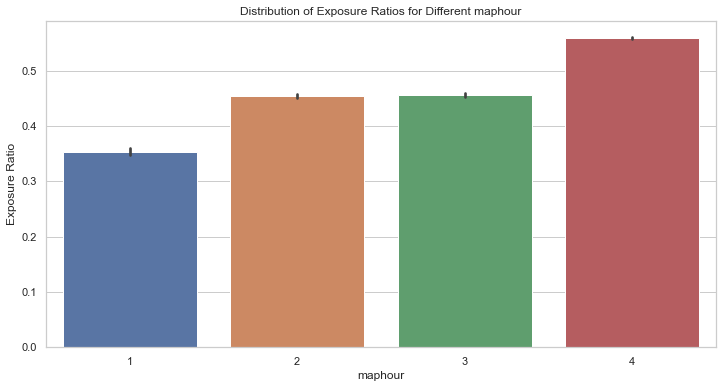

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with NaN values in 'item_maphour_cnt_ratio'
filtered_data = data.dropna(subset=['item_maphour_cnt_ratio'])

# Exclude the 'item_id' from the plot
maphour_plot_data = filtered_data[['maphour', 'item_maphour_cnt_ratio']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='maphour', y='item_maphour_cnt_ratio', data=maphour_plot_data)

# Set labels and title
plt.xlabel('maphour')
plt.ylabel('Exposure Ratio')
plt.title('Distribution of Exposure Ratios for Different maphour')

# Show the plot
plt.show()


具体解释如下：

x 轴表示不同的时间段（maphour）。
y 轴表示对应时间段内商品曝光比例的均值（或中位数，具体取决于条形图的高度展示）。
每个条形图的高度反映了该时间段内商品曝光比例的平均水平。

比较不同时间段内商品曝光比例的平均水平：了解商品曝光比例在不同时间段的分布趋势，图中每个条形的高度越高，表示该时间段内商品曝光比例越大。整体趋势可以帮助你分析商品在不同时间段的受欢迎程度，并可能有助于制定相关的营销或推广策略。

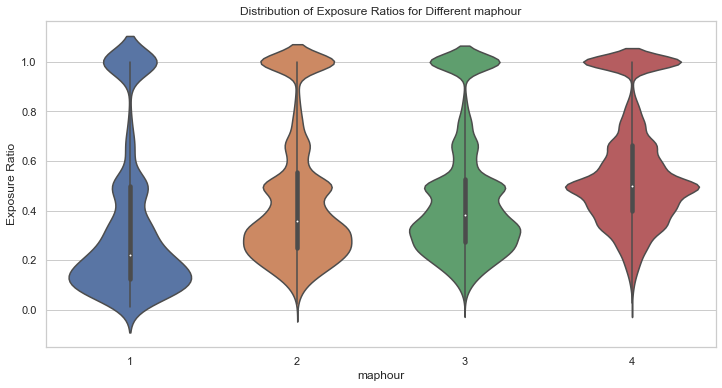

In [277]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='maphour', y='item_maphour_cnt_ratio', data=maphour_plot_data)
plt.xlabel('maphour')
plt.ylabel('Exposure Ratio')
plt.title('Distribution of Exposure Ratios for Different maphour')
plt.show()


形状： Violin图的整体形状代表了数据的分布。它是左右对称的，其中的粗度表示数据的相对频率或密度。

中间的白点： 中间的白点通常表示中位数。中位数是将数据分为两半的值，即50%的观察值在中位数的左侧，50%在右侧。

箱线图： Violin图中间的矩形框代表了四分位数范围，包括上下四分位数（Q1和Q3）。箱线图提供了关于数据的离散程度和中间50%观察值的信息。

细长的尾部： Violin图的细长尾部延伸到箱线图的外部，提供了有关数据分布的额外信息。如果尾部较长，说明数据分布的离散度较大。

核密度估计： Violin图的宽度在垂直方向上表示在某个值处的数据点密度。更宽的部分意味着在该位置有更多的数据点。

In [278]:
# 用户id每小时曝光数，得到每个user_id在每个hour的实例数量占比
exp_hour = data.groupby(['user_id', 'hour']).instance_id.nunique().to_frame()
exp_hour.columns = ['user_hour_cnt']
exp_hour = exp_hour.reset_index()
#通过计算每个用户在每个小时的实例数量占总数的比例
#得到的是每个用户在每个小时内的广告曝光相对于该用户总曝光数的比例。
# 这个比例可以反映出用户在不同时间段内被暴露给广告的程度，即在每个小时内广告曝光在总体曝光中的占比。
exp_hour['user_hour_cnt_ratio'] = round(exp_hour.user_hour_cnt / exp_hour.groupby('user_id').user_hour_cnt.transform(np.sum), 5)
exp_hour = exp_hour[['user_id', 'hour', 'user_hour_cnt_ratio']]
data = data.merge(exp_hour, how='left', on=['user_id', 'hour'])

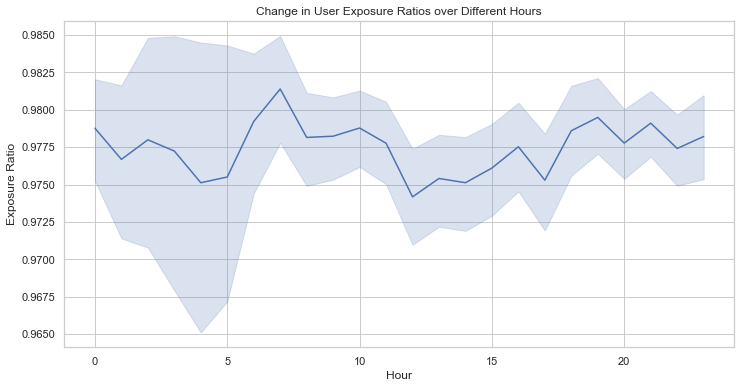

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows with NaN values in 'user_hour_cnt_ratio'
filtered_data = data.dropna(subset=['user_hour_cnt_ratio'])

# Exclude the 'user_id' from the plot
user_hour_plot_data = filtered_data[['hour', 'user_hour_cnt_ratio']]

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='user_hour_cnt_ratio', data=user_hour_plot_data)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Exposure Ratio')
plt.title('Change in User Exposure Ratios over Different Hours')

# Show the plot
plt.show()


可以了解用户在一天内的不同时间段内对广告的关注程度。例如，曲线上升的时段可能是用户活跃度较高，广告曝光更容易引起用户的注意。相反，曲线下降的时段可能是用户较为不活跃，广告曝光相对不那么显著。这样的分析有助于确定何时进行广告投放以提高曝光效果。

In [280]:
# 每个user_id在每个时间段的实例数量
exp_tz = data.groupby(['user_id', 'maphour']).instance_id.nunique().to_frame()
exp_tz.columns = ['user_maphour_cnt']
exp_tz = exp_tz.reset_index()
exp_tz['user_maphour_cnt_ratio'] = round(exp_tz.user_maphour_cnt / exp_tz.groupby('user_id').user_maphour_cnt.transform(np.sum), 5)
exp_tz = exp_tz[['user_id', 'maphour', 'user_maphour_cnt_ratio']]
data = data.merge(exp_tz, how='left', on=['user_id', 'maphour'])
gc.collect() #垃圾回收机制

49832

In [281]:
#user_id和context_timestamp进行分组，并统计每个分组中的不重复的数量
add = pd.DataFrame(data.groupby(["user_id", "context_timestamp"]).instance_id.nunique()).reset_index()
add.columns = ["user_id", "context_timestamp", "same_time_expo_cnt"]
data = data.merge(add, on=["user_id", "context_timestamp"], how="left")

In [282]:
# 小时均值特征
grouped = data.groupby('user_id')['hour'].mean().reset_index()
grouped.columns = ['user_id', 'user_mean_hour']
data = data.merge(grouped, how='left', on='user_id')
grouped = data.groupby('item_id')['hour'].mean().reset_index()
grouped.columns = ['item_id', 'item_mean_hour']
data = data.merge(grouped, how='left', on='item_id')
grouped = data.groupby('item_brand_id')['hour'].mean().reset_index()
grouped.columns = ['item_brand_id', 'brand_mean_hour']
data = data.merge(grouped, how='left', on='item_brand_id')
grouped = data.groupby('shop_id')['hour'].mean().reset_index()
grouped.columns = ['shop_id', 'shop_mean_hour']
data = data.merge(grouped, how='left', on='shop_id')

user_mean_hour: 用户在数据集中的小时均值
item_mean_hour: 商品在数据集中的小时均值
brand_mean_hour: 商品品牌在数据集中的小时均值
shop_mean_hour: 店铺在数据集中的小时均值
这些特征可以用来表示不同用户、商品、商品品牌和店铺在不同小时的平均活动时间。
了解它们在一天中哪个时间段更活跃或更受欢迎。

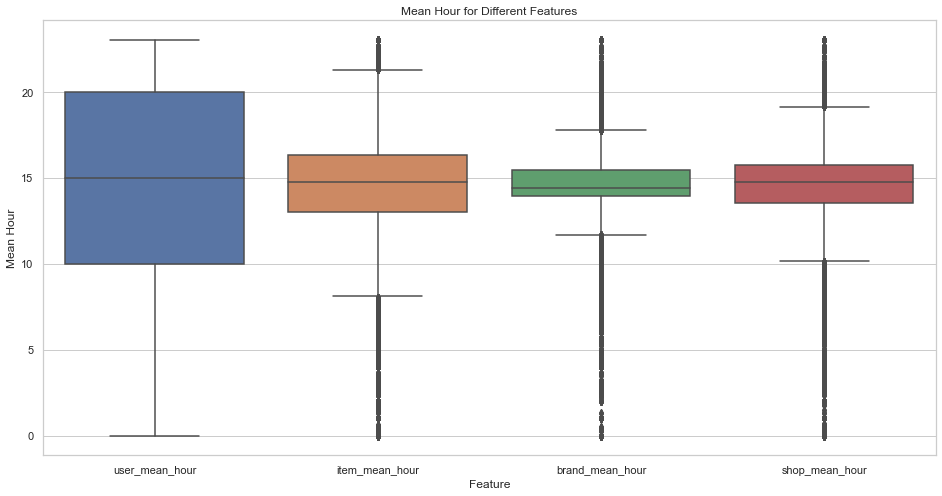

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn样式
sns.set(style="whitegrid")

# 创建一个大的图表
plt.figure(figsize=(16, 8))

# 使用Seaborn的箱线图展示不同特征的小时均值
sns.boxplot(x='feature', y='mean_hour', data=mean_hour_df_long)

# 添加标签和标题
plt.xlabel('Feature')
plt.ylabel('Mean Hour')
plt.title('Mean Hour for Different Features')

# 显示图表
plt.show()


箱体（Box）： 箱体展示了数据的中间50%。箱体上边缘表示75%分位数（Q3），下边缘表示25%分位数（Q1），箱体的高度表示数据的四分之一距离。

中位数（Median）： 箱体中间的线表示数据的中位数。

触须（Whiskers）： 触须通常延伸到数据中的最小和最大值，但有时也可能表示离群值的范围。触须通常是箱体高度的1.5倍的距离，超过这个距离的点被认为是离群值。

离群值（Outliers）： 超过触须范围的数据点通常被认为是离群值。

解读小时均值特征的箱线图：

对于每个小时均值特征（user_mean_hour、item_mean_hour、brand_mean_hour、shop_mean_hour），箱线图显示了该特征的分布情况。

箱体的位置表示中位数，箱体的高度表示数据分布的范围。

触须延伸到数据中的最小和最大值，可能包含离群值。

离群值是那些相对于其他数据点明显偏离的值。

通过箱线图，您可以了解每个小时均值特征的中位数、分布范围以及是否存在离群值。这有助于识别在一天的不同时间段内，用户、商品、商品品牌和商店的活跃度或受欢迎程度是否存在显著差异

In [284]:
# 年龄均值特征
grouped = data.groupby('user_id')['user_age_level'].mean().reset_index()
grouped.columns = ['user_id', 'user_mean_age']
data = data.merge(grouped, how='left', on='user_id')

grouped = data.groupby('item_id')['user_age_level'].mean().reset_index()
grouped.columns = ['item_id', 'item_mean_age']
data = data.merge(grouped, how='left', on='item_id')

grouped = data.groupby('item_brand_id')['user_age_level'].mean().reset_index()
grouped.columns = ['item_brand_id', 'brand_mean_age']
data = data.merge(grouped, how='left', on='item_brand_id')

grouped = data.groupby('shop_id')['user_age_level'].mean().reset_index()
grouped.columns = ['shop_id', 'shop_mean_age']
data = data.merge(grouped, how='left', on='shop_id')

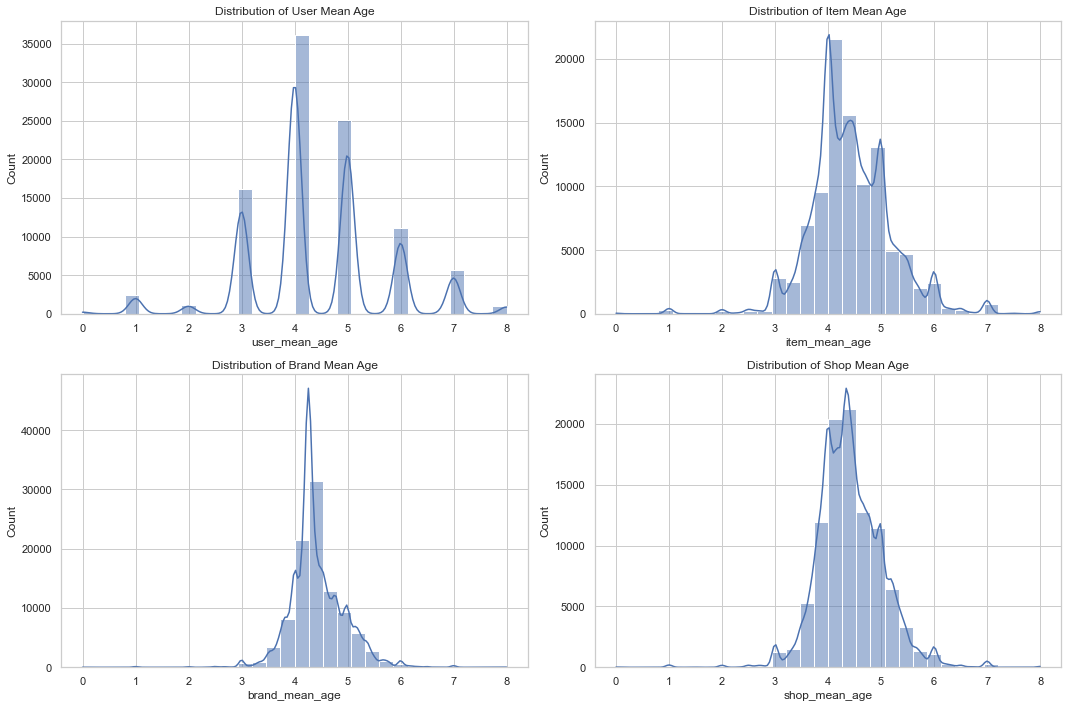

In [285]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot User Mean Age
sns.histplot(data['user_mean_age'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of User Mean Age')

# Plot Item Mean Age
sns.histplot(data['item_mean_age'].dropna(), bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Item Mean Age')

# Plot Brand Mean Age
sns.histplot(data['brand_mean_age'].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Brand Mean Age')

# Plot Shop Mean Age
sns.histplot(data['shop_mean_age'].dropna(), bins=30, kde=True, ax=axes[3])
axes[3].set_title('Distribution of Shop Mean Age')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



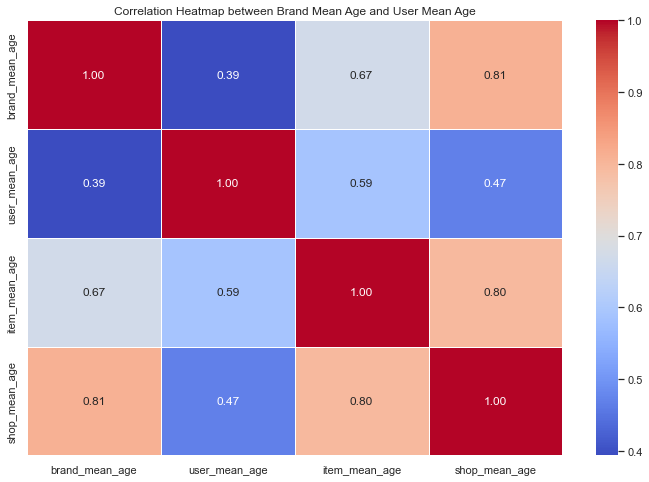

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
sns.heatmap(data[['brand_mean_age', 'user_mean_age','item_mean_age','shop_mean_age']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap between Brand Mean Age and User Mean Age')
plt.show()


brand shop相关性较高，说明品牌的年龄可能与店铺的年龄有一定的关联，用户可能更倾向于在喜欢的品牌下购物，而这些品牌很可能在同一时间也出现在特定的店铺中。因此，品牌和店铺之间的相关性可能反映了用户对特定品牌的忠诚度。


In [287]:
 #小时特征,每个用户计算活动
add = pd.DataFrame(data.groupby(["user_id"]).hour.nunique()).reset_index()
add.columns = ["user_id", "user_active_hour"]
data = data.merge(add, on=["user_id"], how="left")

In [288]:
# 不同用户在每一天的活跃城市数量
add = pd.DataFrame(data.groupby(["user_id", "day"]).item_city_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_city"]
data = data.merge(add, on=["user_id", "day"], how="left")

In [289]:
#活跃user数特征
add = pd.DataFrame(data.groupby(["item_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["item_id", "day", "item_day_active_user"]
data = data.merge(add, on=["item_id", "day"], how="left")
add = pd.DataFrame(data.groupby(["shop_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["shop_id", "day", "shop_day_active_user"]
data = data.merge(add, on=["shop_id", "day"], how="left")
add = pd.DataFrame(data.groupby(["item_brand_id", "day"]).user_id.nunique()).reset_index()
add.columns = ["item_brand_id", "day", "brand_day_active_user"]
data = data.merge(add, on=["item_brand_id", "day"], how="left")



add = pd.DataFrame(data.groupby(["item_id", "day", "hour"]).user_id.nunique()).reset_index()
add.columns = ["item_id", "day", "hour", "item_hour_active_user"]
data = data.merge(add, on=["item_id", "day", "hour"], how="left")
add = pd.DataFrame(data.groupby(["shop_id", "day", "hour"]).user_id.nunique()).reset_index()
add.columns = ["shop_id", "day", "hour", "shop_hour_active_user"]
data = data.merge(add, on=["shop_id", "day", "hour"], how="left")

# 活跃shop数特征
add = pd.DataFrame(data.groupby(["user_id", "day"]).shop_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_shop"]
data = data.merge(add, on=["user_id", "day"], how="left")

# 活跃brand数特征 
add = pd.DataFrame(data.groupby(["user_id", "day"]).item_brand_id.nunique()).reset_index()
add.columns = ["user_id", "day", "user_day_active_brand"]
data = data.merge(add, on=["user_id", "day"], how="left")

add = pd.DataFrame(data.groupby(["user_id", "day", "hour"]).item_brand_id.nunique()).reset_index()
add.columns = ["user_id", "day", "hour", "user_hour_active_brand"]
data = data.merge(add, on=["user_id", "day", "hour"], how="left")

In [290]:
# 得到全部训练集
print('经过处理后,全部训练集最终维度:', data.shape)
data.to_csv(path+'all_01.csv', index=False)

# 得到7号训练集
data = data.loc[data.day==7]
print('7号训练集,最终维度:', data.shape)
print(data.columns.tolist())
data.to_csv(path+'day7_01.csv', index=False)

经过处理后,全部训练集最终维度: (99085, 55)
7号训练集,最终维度: (10184, 55)
['instance_id', 'item_id', 'item_brand_id', 'item_city_id', 'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_id', 'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 'context_id', 'context_timestamp', 'context_page_id', 'shop_id', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_star_level', 'shop_score_service', 'shop_score_delivery', 'shop_score_description', 'is_trade', 'time', 'day', 'hour', 'minute', 'maphour', 'mapmin', 'item_category_0', 'item_category_1', 'item_category_2', 'item_maphour_cnt_ratio', 'user_hour_cnt_ratio', 'user_maphour_cnt_ratio', 'same_time_expo_cnt', 'user_mean_hour', 'item_mean_hour', 'brand_mean_hour', 'shop_mean_hour', 'user_mean_age', 'item_mean_age', 'brand_mean_age', 'shop_mean_age', 'user_active_hour', 'user_day_active_city', 'item_day_active_user', 'shop_day_active_user', 'brand_day_active_user', 'item_hour_active_user', 'shop

In [291]:
path = '/Users/apple/Desktop/data/'
# 将列和数据类型存储为 DataFrame
columns_data_types = pd.DataFrame({'Column': data.columns, 'Data Type':data.dtypes})

# 保存为 CSV 文件
columns_data_types.to_csv(path+'columns_data_types1.csv', index=False)

## EDA

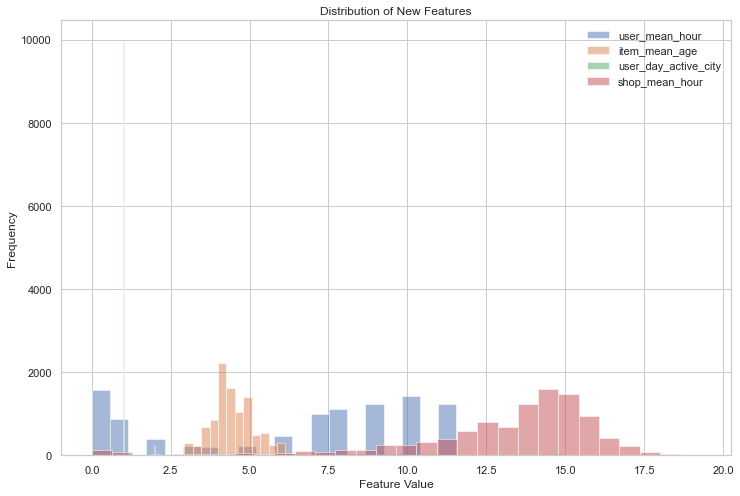

In [292]:
import pandas as pd
import matplotlib.pyplot as plt


# 选择要可视化的特征
features_to_visualize = ['user_mean_hour', 'item_mean_age', 'user_day_active_city', 'shop_mean_hour']

# 绘制直方图
plt.figure(figsize=(12, 8))
for feature in features_to_visualize:
    plt.hist(data[feature].dropna(), bins=30, alpha=0.5, label=feature)

plt.title('Distribution of New Features')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()